# Exercise: Pipeline

In this exercise, we aim to train a pipeline along with parameter tuning and perform prediction with the best model. More specifically we accomplish the following tasks: 

1. Develop a pipeline with feature extraction and linear regression models  
2. Perform grid search with the pipeline for optimizing some hyper-parameters
3. Evaluate the best model's performance
4. Identify the second best model 


The dataset we will be using for the dataset is face dataset.

## Face Data

(from SciKit Learn Docs)

This dataset is a collection of JPEG pictures of famous people collected over the internet, 
all details are available on the official website:

  *  http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. 
The typical task is called Face Verification: 
given a pair of two pictures, 
a binary classifier must predict whether the two images are from the same person.

An alternative task, 
Face Recognition or Face Identification is: 
given the picture of the face of an unknown person, 
identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

Both Face Verification and Face Recognition are tasks that are typically 
performed on the output of a model trained to perform Face Detection. 
The most popular model for Face Detection is called Viola-Jones and is 
implemented in the OpenCV library. 
The LFW faces were extracted by this face detector from various online websites.

---

# Import libs

In [2]:
# Import all the libs you need:

from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_lfw_people
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
%matplotlib inline

## Load necessary libraries



# Load the Dataset
Load the dataset from sklearn datasets using `fetch_lfw_people`. Print the number of samples, features, and  classes.

In [3]:
# load the dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


# Visualize Some Sample Images
Randomly sample 9 images from the dataset and visualize them in a 3X3 grid with their labels. 

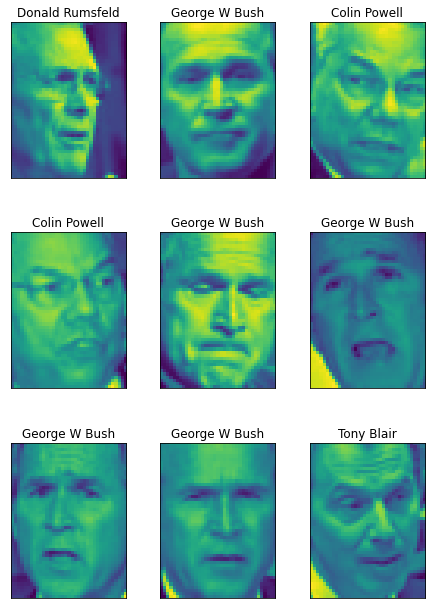

In [4]:
# visualize using matplot lib

from matplotlib import pyplot
import numpy as np

row = 3
col = 3
total_sample = len(lfw_people.data)

pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=2, hspace=.35)


for i in range(row*col):
    pyplot.subplot(row, col, i+1)
    random_index = np.random.randint(0, total_sample)
    single_label = np.copy(lfw_people.data[random_index, :])
    single_label = single_label.reshape((h,w))
    pyplot.title(target_names[lfw_people.target[random_index]], size=12)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.imshow(single_label)

# Split the dataset
Split the dataset into train (75%) and test (25%).

In [5]:
# split the dataset (E001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Build a Pipeline

Now we build a pipeline that performs feature extraction with PCA followed by classification using logistic regression. While developing the pipeline, we perform the following tasks. 

1. For PCA vary the `n_components` parameter and for logistic regression vary the regularization parameter `C`. Use at least 5 different values for each of these parameters. 
2. Use 10-fold cross validation while using the gridsearch


Note: If LogisticRegression doesn't converge increase the value for `max_iter`. 

## Define the pipeline


In [20]:
# Define the pipeline (E002)

pipe = Pipeline([
    ('PCA', PCA(n_components= 5)),
    ('logistic', LogisticRegression())
])

In [23]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'PCA', 'logistic', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

## Configure the Parameters for Grid Search

In [37]:
# Configure the parameters for grid search (E003)

param_grid = {'logistic__C': [5,10,15,20,25],
              'logistic__max_iter': [10000],
              'PCA__n_components': [5,10,15,20,25],}

## Train the Pipeline with Grid Search

In [42]:
# Train the Pipeline with Grid Search (E004)
from sklearn.model_selection import GridSearchCV

model_grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=2) # nothing was stated about number of parallel jobs

model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('PCA', PCA(n_components=5)),
                                       ('logistic', LogisticRegression())]),
             n_jobs=2,
             param_grid={'PCA__n_components': [5, 10, 15, 20, 25],
                         'logistic__C': [5, 10, 15, 20, 25],
                         'logistic__max_iter': [10000]})

Once the pipline is fitted, we can address the following tasks. 

## Show the parameters of the trained models and their rankings within this pipeline

In [39]:
# Show the parameters of the trained models and their rankings in a table (E005)

model_grid.cv_results_


{'mean_fit_time': array([0.2274498 , 0.24036338, 0.24323487, 0.24800088, 0.2246402 ,
        0.46617081, 0.54872041, 0.53362439, 0.6033325 , 0.54338996,
        1.15380781, 1.20983608, 1.18428338, 1.26001968, 1.05059359,
        2.97272699, 3.118909  , 2.46927032, 3.21191273, 2.41257796,
        4.02082157, 3.78727894, 3.66001246, 3.12600908, 3.06930363]),
 'std_fit_time': array([0.02225535, 0.03315651, 0.06723983, 0.05468784, 0.03508775,
        0.17922546, 0.30526719, 0.28886924, 0.1884606 , 0.16962151,
        0.3223585 , 0.23837197, 0.47900342, 0.37348276, 0.30357764,
        0.89570063, 0.98046108, 0.95231819, 1.17097905, 0.88886992,
        1.6708071 , 1.12887397, 1.73349436, 1.750006  , 2.02185718]),
 'mean_score_time': array([0.00140321, 0.00147505, 0.00169795, 0.00148942, 0.00144382,
        0.00141373, 0.00133963, 0.00124938, 0.00148897, 0.00141664,
        0.00143321, 0.00163953, 0.00145924, 0.0015522 , 0.001507  ,
        0.0013552 , 0.0012948 , 0.00151834, 0.0013767 , 0.00

## Show the parameters of the best model

In [57]:
# Show the best model's parameters (E006)

model_grid.best_params_


{'PCA__n_components': 25, 'logistic__C': 25, 'logistic__max_iter': 10000}

## Show the parameters of the second best model

In [65]:
# Show the parameters of the second best model (E007)

results = pd.DataFrame(model_grid.cv_results_) # store cv_results in a df
results.sort_values(by='rank_test_score', inplace=True) # sort by rank_test_score

best_params_2nd = results.loc[23, 'params'] # second to last index
#estimator_2nd = model_grid.best_estimator_.set_params(**best_params_2nd)

best_params_2nd

{'PCA__n_components': 25, 'logistic__C': 20, 'logistic__max_iter': 10000}

## Show the mean and stddev of the test scores (i.e CV scores) for the second best model

In [73]:
# Show the mean and stddev of the test scores (i.e CV scores) for the second best model (E008)

model_grid.cv_results_['mean_test_score'][23]

0.714379295532646

In [74]:
model_grid.cv_results_['std_test_score'][23]

0.03645769437516096

## Evaluate the best model using the test data

Perform the following tasks: 

1. Make prediction
1. Show confusion matrix
1. Show classification task

In [80]:
# Make prediction (E009)

predicted_y = model_grid.predict(X_test)
predicted_y

array([3, 3, 2, 1, 0, 3, 3, 1, 2, 3, 5, 5, 6, 1, 3, 1, 3, 6, 6, 3, 3, 6,
       0, 6, 1, 3, 1, 0, 4, 3, 3, 1, 4, 4, 1, 1, 3, 3, 3, 2, 2, 1, 2, 1,
       3, 3, 1, 3, 5, 3, 3, 3, 6, 3, 6, 3, 6, 1, 3, 3, 6, 6, 5, 0, 5, 5,
       6, 3, 3, 6, 3, 3, 6, 3, 1, 3, 5, 1, 1, 6, 3, 6, 3, 6, 3, 1, 6, 6,
       1, 0, 4, 2, 4, 5, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3, 0, 1,
       0, 6, 4, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 1, 6, 2,
       0, 6, 3, 6, 6, 6, 2, 6, 6, 6, 5, 3, 3, 1, 4, 6, 6, 2, 5, 6, 3, 1,
       0, 3, 3, 3, 1, 3, 1, 0, 3, 3, 3, 1, 3, 5, 2, 3, 2, 3, 4, 1, 2, 3,
       1, 2, 6, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 1, 0, 1, 1, 3, 3, 6, 1, 1,
       3, 3, 1, 1, 6, 5, 0, 5, 3, 2, 3, 3, 3, 2, 1, 6, 3, 3, 3, 3, 5, 3,
       3, 3, 2, 0, 5, 3, 3, 3, 6, 1, 6, 1, 1, 6, 3, 2, 4, 4, 6, 3, 4, 3,
       6, 3, 0, 3, 3, 3, 6, 1, 4, 0, 2, 1, 3, 2, 1, 3, 5, 2, 3, 3, 5, 0,
       0, 6, 3, 1, 3, 1, 1, 0, 5, 1, 6, 4, 2, 3, 3, 4, 0, 2, 3, 3, 1, 1,
       3, 6, 3, 1, 2, 4, 5, 2, 3, 1, 2, 3, 3, 0, 3,

In [79]:
# Show confusion matrix (E010)
pd.DataFrame(confusion_matrix(y_test, predicted_y))

,0,1,2,3,4,5,6
0,11,3,3,4,0,0,1
1,4,41,1,2,1,1,3
2,3,7,19,6,0,0,1
3,3,3,5,109,1,0,4
4,0,3,1,3,11,6,10
5,0,0,0,2,1,14,3
6,1,2,0,3,3,0,23


In [78]:
# Show the classification report (E011)

print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        22
           1       0.69      0.77      0.73        53
           2       0.66      0.53      0.58        36
           3       0.84      0.87      0.86       125
           4       0.65      0.32      0.43        34
           5       0.67      0.70      0.68        20
           6       0.51      0.72      0.60        32

    accuracy                           0.71       322
   macro avg       0.65      0.63      0.63       322
weighted avg       0.71      0.71      0.70       322



# Save your Notebook, then `File > Close and Halt`